In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Transformar variables categóricas a string para mejorar calidad de gráficos de análisis
def CHOSEN_t(row):
    if row == 1: return 'Veh'
    else: return 'No Veh'
def INCOME_t(row):
    if row == 1: return 'Less 50000'
    if row == 2: return '50000 - 100000'
    else: return 'More 100000'
def ETHN_t(row):
    if row == 1: return 'Blanca'
    if row == 2: return 'Afroamericana'
    if row == 3:  return 'Asiático'
    else: return 'Hispano'
def PTRANSP_t(row):
    if row == 1:  return 'At least one use public transp'
    else:   return 'No one use public transp'
def SOLPAN_t(row):
    if row == 1: return 'Have solar panel'
    else: return 'No have solar panel'
def WALKBIKE_t(row):
    if row == 1: return 'At least one use bike'
    else: return 'No one use bike'
def TELECO_t(row):
    if row ==1: return 'At least one home office'
    else: return 'No one home office'
def PSENIORS_t(row):
    if row == 1: return 'At least one Older adult'
    else: return 'No Older adult'
def NEIGHB_t(row):
    if row == 1: return 'Neighbor has veh'
    else: return 'Neighbor has no veh'
def SPOOL_t(row):
    if row == 1: return 'Has swimming pool'
    else: return 'No has pool'
def CABLE_t(row):
    if row == 1: return 'Has cable'
    else: return 'No has cable'

def transform_cat(data, conjunto):
    data2 = data.copy()
    data2['CHOSEN'] = data['CHOSEN'].map(CHOSEN_t)
    data2['INCOME'] = data['INCOME'].map(INCOME_t)
    data2['ETHN'] = data['ETHN'].map(ETHN_t)
    data2['PTRANSP'] = data['PTRANSP'].map(PTRANSP_t)
    data2['SOLPAN'] = data['SOLPAN'].map(SOLPAN_t)
    data2['WALKBIKE'] = data['WALKBIKE'].map(WALKBIKE_t)
    data2['TELECO'] = data['TELECO'].map(TELECO_t)
    data2['PSENIORS'] = data['PSENIORS'].map(PSENIORS_t)
    data2['NEIGHB'] = data['NEIGHB'].map(NEIGHB_t)
    data2['SPOOL'] = data['SPOOL'].map(SPOOL_t)
    data2['CABLE'] = data['CABLE'].map(CABLE_t)
    return data2

In [3]:
#graficar variable decisión
def fig_y(data2):
    decision = sns.countplot(data2['CHOSEN'])
    for p in decision.patches:
        decision.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.title('Histograma variable Elección de Vino', fontsize = 13)
    plt.xlabel('Tipo de Vino')
    plt.ylabel(None)
    plt.xticks(rotation=0)

In [4]:
#histograma de variables continuas de forma independiente
def fig_hist(data2, var):
    sns.set_style("darkgrid")
    sns.distplot(data2[var], bins = 'auto')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Histogram ' + var , fontsize = 13)

In [5]:
#tablas para imprimir análisis de dos variables con respecto a una variable y muchos gráficos a la vez
def table2f(data, variables, var_chosen, proportion = False, stacked_bar = False):
    for var in variables: 
        if proportion == False:
            table = pd.crosstab(data[var], data[var_chosen]).plot(kind = 'bar',stacked = stacked_bar, figsize = (12,4))
        if proportion == True:
            table = pd.crosstab(data[var], data[var_chosen])
            table = table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = stacked_bar, figsize = (12,4) )
        if stacked_bar == False:
            for p in table.patches:
                table.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        plt.title('Adquisición vehículo eléctrico vs ' + var, fontsize = 12)
        plt.xticks(rotation = 45)
        plt.xlabel(None)

In [6]:
#tabla para analizar 2 variables con respecto a una variable de decision, 1 grafico a la vez
def table3f(data, feature1, feature2, chosen, proportion = False, stacked_bar = False):
    if proportion == False:
        table = pd.crosstab([data[feature1], data[feature2]], data[chosen]).plot(kind = 'bar',stacked = stacked_bar, figsize = (15,7))
    if proportion == True:
        table = pd.crosstab([data[feature1], data[feature2]], data[chosen])
        table = table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = stacked_bar, figsize = (15,7) )
    if stacked_bar == False:
        for p in table.patches:
            table.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.title('Adquisición vehículo eléctrico vs ' + feature1 + ' '+ feature2, fontsize = 12)
    plt.xticks(rotation = 45)
    plt.xlabel(None)

In [7]:
#tabla resumen de la proporción de cada variable categórica 
def resume_table(data2, variables, var_chosen, tipo = 'percent'):
    if tipo == 'count':
        aux = np.array(data2[var_chosen].value_counts().tolist()).reshape(1,len(data2[var_chosen].value_counts().unique()))
        resume = pd.DataFrame(aux , columns = data2[var_chosen].value_counts().index.tolist())
        resume.index =  pd.MultiIndex.from_product([ [var_chosen]  , ['Mean'] ] )
    
    if tipo == 'percent':
        aux = np.array(data2[var_chosen].value_counts().tolist()).reshape(1,len(data2[var_chosen].value_counts().unique()))
        resume = pd.DataFrame(aux / aux.sum() , columns = data2[var_chosen].value_counts().index.tolist())
        resume.index =  pd.MultiIndex.from_product([ [var_chosen]  , ['Mean'] ] )
    for var in variables:
        if tipo == 'count':
            data_aux = pd.crosstab(data2[var], data2[var_chosen])
            data_aux.index = pd.MultiIndex.from_product([ [var]  , data2[var].unique().tolist() ] )
            resume = pd.concat((resume,data_aux) , axis = 0, sort = False)
        if tipo == 'percent':
            data_aux = pd.crosstab(data2[var], data2[var_chosen])
            data_aux = data_aux.div(data_aux.sum(1).astype(float), axis = 0)
            data_aux.index = pd.MultiIndex.from_product([ [var]  , data2[var].unique().tolist() ] )
            resume = pd.concat((resume,data_aux) , axis = 0, sort = False)

    return resume

In [8]:
#tabla resumen para analizar los datos categóricos
def Analysis_Data(data, col_analizar):
    resumen_datos = pd.DataFrame()
    for i in col_analizar:
        #obtener valores de cada una de las características
        A = data[i].value_counts()
        #crear base de datos con el total y porcentaje de cada caracteerística
        B = pd.DataFrame({ 'Total' : A, 'Percent': A.map(lambda x: x / A.sum())  })
        # crear multiindex
        B.index = pd.MultiIndex.from_product([[i], A.index.tolist()] )
        # unir a una sola base datos
        resumen_datos = pd.concat([resumen_datos, B], axis = 0)
    
    return resumen_datos

CHOSEN 1: Adoptar vehículo eléctrico, 2: otro caso 

INCOME Ingreso disponible de los hogares(USD/año) 1: Menos de 50000 USD, 2: Entre 50000
USD y 100000 USD , 3: Más de 100000

HHSIZE Tamaño del hogar (número de personas en el hogar)

NUMVEH Número de vehículos (autos) en el hogar

WOMEN Número de mujeres en el hogar

MEN Número de hombres en el hogar

NWORK Número de personas que trabajan en el hogar

NCHILD Número de niños, menores de 16 años en el hogar

NYCHILD Número de niños muy jóvenes, menores a 5 años en el hogar

ETHN Etnia, 1: Blanca, 2: Afroamericana, 3: Asiático, 4: Hispano

DIST Distancia (millas) entre el hogar hasta el centro comercial más cercano

NBIKES Número de bicicletas en el hogar

PTRANSP 1: Al menos un miembro del hogar usa transporte público, 0: en otro caso

SOLARPAN 1: Hay al menos un panel solar en el hogar, 0: en otro caso

WALKBIKE 1: Al menos un miembro del hogar camina o va en bicicleta al trabajo, 0: e.o.c

TELECO 1: Al menos un miembro del hogar trabaja desde casa, 0: en otro caso

PSENIORS 1: Al menos un miembro del hogar es un adulto mayor(mayor a 65), 0: e.o.c

GRAD Número de miembros del hogar con estudios universitarios

POPDENSE Densidad de la población (persona por milla cuadrada) en el código postal de
residencia

NEIGHB 1: Vecino posee vehículo eléctrico, 0: en otro caso

SMARTPH Número de miembros del hogar que poseen smartphone

SPOOL 1: El hogar posee piscina, 0: en otro caso

CABLE 1: El hogar posee cable, 0: en otro caso

COST Costo Anual del vehículo eléctrico en 10000 USD

# Preliminary data analysis

#### Data loading and first analysis

In [9]:
#data = pd.read_csv('datasets/Data1_Aplication_to_electric_vehicle_adoption.txt', delim_whitespace=True, index_col= 'HHID')
data = pd.read_csv('HW01_data_eveh.csv')
data.head()

,HHID,CHOSEN,INCOME,HHSIZE,WOMEN,MEN,NWORK,NCHILD,NYCHILD,ETHN,...,TELECO,PSENIORS,GRAD,POPDENSE,NEIGHB,SMARTPH,SPOOL,CABLE,COST,UNO
0,1,2,2,1,1,0,1,0,0,2,...,0,0,0,1.98106,0,0,1,0,6.855,1
1,2,2,1,1,1,0,1,0,0,4,...,0,0,0,2.82594,0,0,0,0,5.032,1
2,3,2,1,1,0,1,1,0,0,3,...,0,0,0,1.48823,0,0,0,1,7.986,1
3,4,2,1,2,1,1,1,1,0,1,...,1,0,0,0.08695,0,1,0,0,8.436,1
4,5,2,3,2,0,2,1,1,0,1,...,0,0,0,0.03597,1,0,0,1,4.869,1


In [10]:
data.describe()

,HHID,CHOSEN,INCOME,HHSIZE,WOMEN,MEN,NWORK,NCHILD,NYCHILD,ETHN,...,TELECO,PSENIORS,GRAD,POPDENSE,NEIGHB,SMARTPH,SPOOL,CABLE,COST,UNO
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,...,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.0
mean,1175.500000,1.810638,1.795319,2.594043,1.304681,1.289362,1.397447,0.785106,0.164255,2.554043,...,0.177872,0.171064,0.250213,0.675924,0.204681,0.725532,0.262128,0.437021,5.606047,1.0
std,678.530889,0.391879,0.749215,1.575774,1.243433,1.215277,0.777719,1.141440,0.514000,1.359675,...,0.382487,0.376645,0.717973,1.007080,0.403554,1.038216,0.439885,0.496123,2.323103,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.003570,0.000000,0.000000,0.000000,0.000000,1.595000,1.0
25%,588.250000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.063650,0.000000,0.000000,0.000000,0.000000,3.570500,1.0
50%,1175.500000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.096205,0.000000,0.000000,0.000000,0.000000,5.620000,1.0
75%,1762.750000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,1.228837,0.000000,1.000000,1.000000,1.000000,7.619500,1.0
max,2350.000000,2.000000,3.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,4.000000,...,1.000000,1.000000,6.000000,3.709980,1.000000,6.000000,1.000000,1.000000,9.677000,1.0


In [11]:
print('DataSet has {} rows and {} features' .format(data.shape[0], data.shape[1]))

DataSet has 2350 rows and 25 features


In [12]:
if data.isnull().sum().any() == False:
    print('DataSet does not have missing values')
else: print('DataSet has at least one missing value')

DataSet does not have missing values


In [13]:
print(data.dtypes)
print('\nDataSet has only numerical features between continuos and categorical features')

HHID          int64
CHOSEN        int64
INCOME        int64
HHSIZE        int64
WOMEN         int64
MEN           int64
NWORK         int64
NCHILD        int64
NYCHILD       int64
ETHN          int64
DIST        float64
NBIKES        int64
PTRANSP       int64
SOLPAN        int64
WALKBIKE      int64
TELECO        int64
PSENIORS      int64
GRAD          int64
POPDENSE    float64
NEIGHB        int64
SMARTPH       int64
SPOOL         int64
CABLE         int64
COST        float64
UNO           int64
dtype: object

DataSet has only numerical features between continuos and categorical features


In [14]:
print('Range of values of each of the features in the DataSet')
print(data.nunique())

Range of values of each of the features in the DataSet
HHID        2350
CHOSEN         2
INCOME         3
HHSIZE         7
WOMEN          8
MEN            8
NWORK          6
NCHILD         7
NYCHILD        6
ETHN           4
DIST         465
NBIKES         6
PTRANSP        2
SOLPAN         2
WALKBIKE       2
TELECO         2
PSENIORS       2
GRAD           7
POPDENSE    2245
NEIGHB         2
SMARTPH        7
SPOOL          2
CABLE          2
COST        2029
UNO            1
dtype: int64


### Transform de categorical features to string

In [15]:
conjunto_cat = ['CHOSEN', 'INCOME' , 'ETHN', 'PTRANSP', 'SOLPAN', 'WALKBIKE' ,'TELECO', 'PSENIORS' ,'NEIGHB', 'SPOOL', 'CABLE']
data2 = transform_cat(data, conjunto_cat)
data2.head()

,HHID,CHOSEN,INCOME,HHSIZE,WOMEN,MEN,NWORK,NCHILD,NYCHILD,ETHN,...,TELECO,PSENIORS,GRAD,POPDENSE,NEIGHB,SMARTPH,SPOOL,CABLE,COST,UNO
0,1,No Veh,50000 - 100000,1,1,0,1,0,0,Afroamericana,...,No one home office,No Older adult,0,1.98106,Neighbor has no veh,0,Has swimming pool,No has cable,6.855,1
1,2,No Veh,Less 50000,1,1,0,1,0,0,Hispano,...,No one home office,No Older adult,0,2.82594,Neighbor has no veh,0,No has pool,No has cable,5.032,1
2,3,No Veh,Less 50000,1,0,1,1,0,0,Asiático,...,No one home office,No Older adult,0,1.48823,Neighbor has no veh,0,No has pool,Has cable,7.986,1
3,4,No Veh,Less 50000,2,1,1,1,1,0,Blanca,...,At least one home office,No Older adult,0,0.08695,Neighbor has no veh,1,No has pool,No has cable,8.436,1
4,5,No Veh,More 100000,2,0,2,1,1,0,Blanca,...,No one home office,No Older adult,0,0.03597,Neighbor has veh,0,No has pool,Has cable,4.869,1


### Analysis decision variable

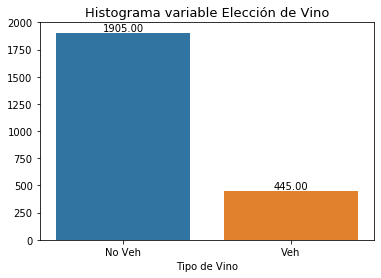

In [16]:
fig_y(data2)

### Analysis categorical features

In [17]:
conjunto_cat2 = ['INCOME' , 'ETHN', 'PTRANSP', 'SOLPAN', 'WALKBIKE' ,'TELECO', 'PSENIORS' ,'NEIGHB', 'SPOOL', 'CABLE']
Analysis_Data(data2, conjunto_cat2)

Total   Percent
INCOME   Less 50000                        949  0.403830
         50000 - 100000                    933  0.397021
         More 100000                       468  0.199149
ETHN     Hispano                           961  0.408936
         Blanca                            920  0.391489
         Asiático                          300  0.127660
         Afroamericana                     169  0.071915
PTRANSP  No one use public transp         1748  0.743830
         At least one use public transp    602  0.256170
SOLPAN   No have solar panel              2181  0.928085
         Have solar panel                  169  0.071915
WALKBIKE No one use bike                  1602  0.681702
         At least one use bike             748  0.318298
TELECO   No one home office               1932  0.822128
         At least one home office          418  0.177872
PSENIORS No Older adult                   1948  0.828936
         At least one Older adult          402  0.171064
NEIGHB   Neighbor has no veh              1869  0.795319
         Neighbor has veh                  481  0.204681
SPOOL    No has pool                      1734  0.737872
         Has swimming pool                 616  0.262128
CABLE    No has cable                     1323  0.562979
         Has cable                        1027  0.437021

### Histogram continuous variable

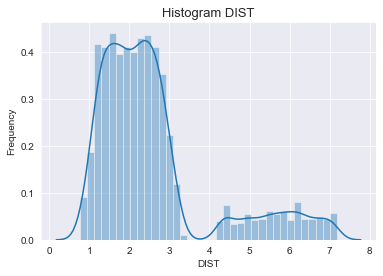

In [18]:
fig_hist(data2, 'DIST')

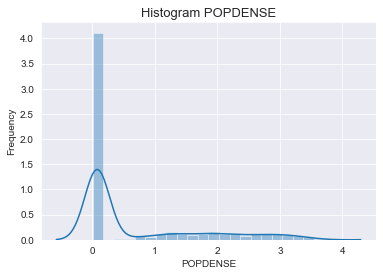

In [19]:
fig_hist(data2, 'POPDENSE')

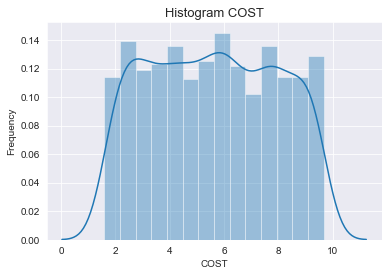

In [20]:
fig_hist(data2, 'COST')

### Analysis categorical variable with decision choise

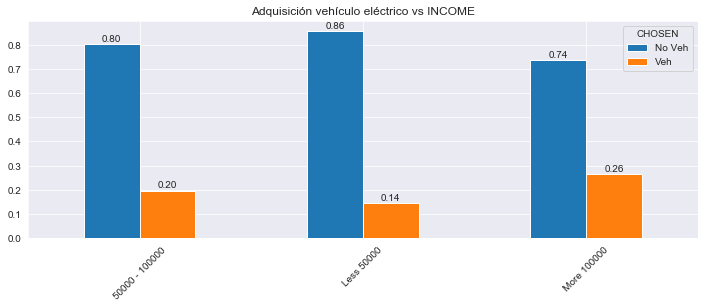

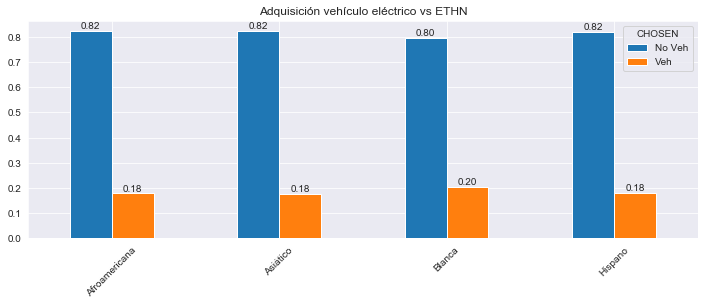

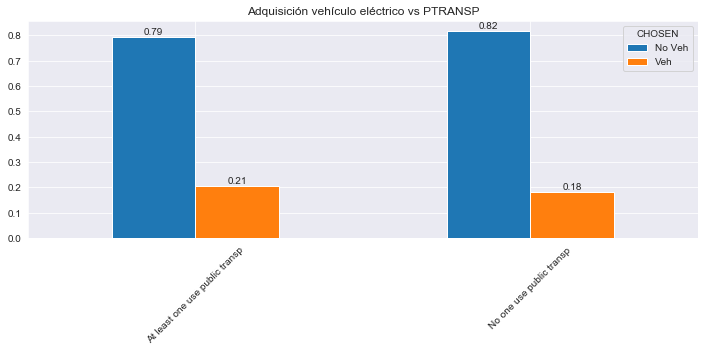

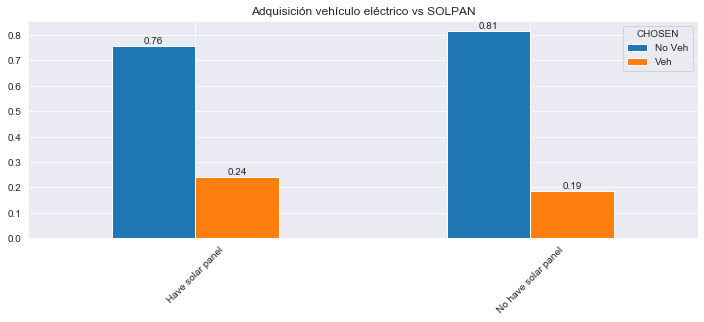

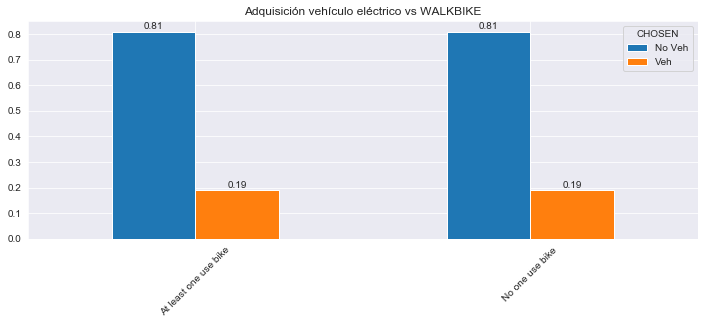

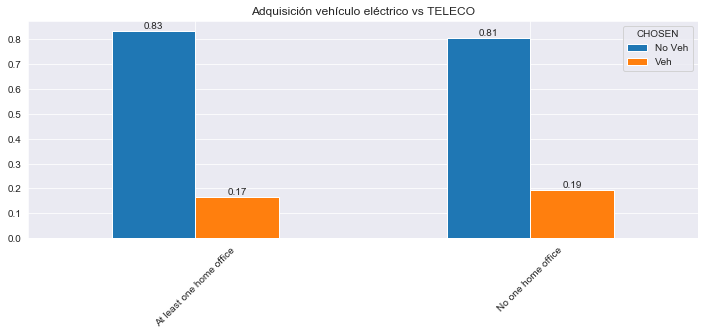

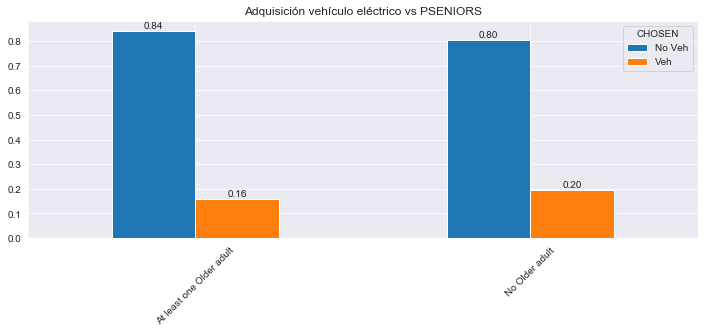

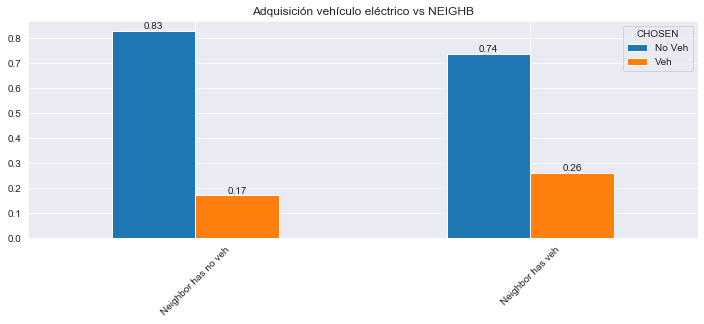

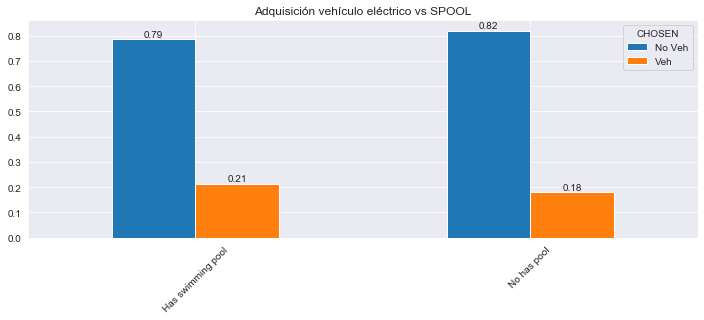

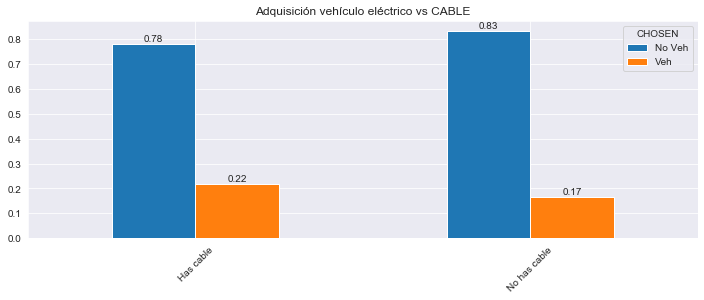

In [21]:
table2f(data2,conjunto_cat2,'CHOSEN', proportion = True, stacked_bar = False)

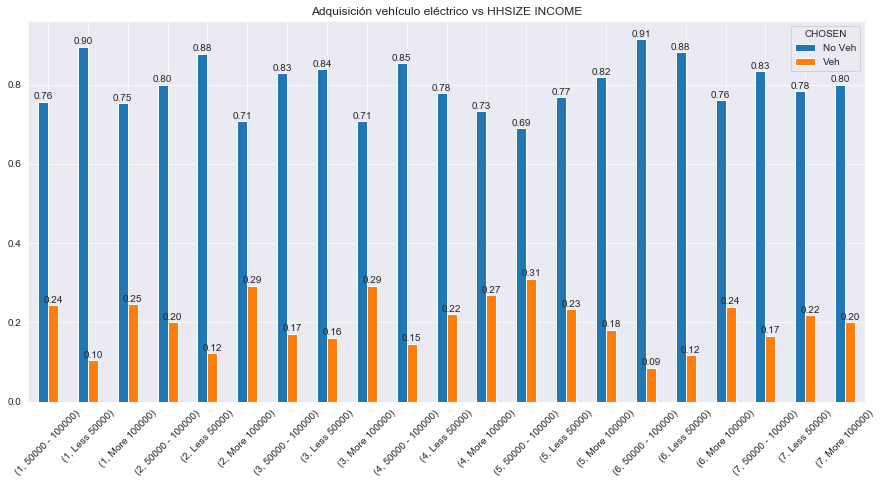

In [22]:
table3f(data2, 'HHSIZE','INCOME', 'CHOSEN', proportion = True, stacked_bar = False)

### Resume with the proportion of each choise

In [23]:
resume_table(data2, conjunto_cat2, 'CHOSEN', 'percent')

CHOSEN                                     No Veh       Veh
CHOSEN   Mean                            0.810638  0.189362
INCOME   50000 - 100000                  0.802787  0.197213
         Less 50000                      0.855638  0.144362
         More 100000                     0.735043  0.264957
ETHN     Afroamericana                   0.822485  0.177515
         Hispano                         0.823333  0.176667
         Asiático                        0.795652  0.204348
         Blanca                          0.818939  0.181061
PTRANSP  At least one use public transp  0.794020  0.205980
         No one use public transp        0.816362  0.183638
SOLPAN   No have solar panel             0.757396  0.242604
         Have solar panel                0.814764  0.185236
WALKBIKE No one use bike                 0.810160  0.189840
         At least one use bike           0.810861  0.189139
TELECO   No one home office              0.832536  0.167464
         At least one home office        0.805901  0.194099
PSENIORS No Older adult                  0.840796  0.159204
         At least one Older adult        0.804415  0.195585
NEIGHB   Neighbor has no veh             0.829320  0.170680
         Neighbor has veh                0.738046  0.261954
SPOOL    Has swimming pool               0.785714  0.214286
         No has pool                     0.819493  0.180507
CABLE    No has cable                    0.780915  0.219085
         Has cable                       0.833711  0.166289

# Logistic Regresion

Analizando las variables, en primer lugar se puede observar que el número de mujeres en el hogar sumado al número de hombres coincide, como es lógico, con el tamaño del hogar. Así como primera idea es considerar sólo esta última variable en el análisis y eliminar el resto.

Se considerararan una serie de modelos para determinar el que más adecuado para modelar la aquisición del vehículo eléctrico.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
#dataSets
datay = data['CHOSEN'].map(lambda x: np.where(x == 2, 0, 1))

feature_no = ['CHOSEN', 'WOMEN', 'MEN']
feature_X = list(set(data.columns.tolist()) - set(feature_no))
dataX = data[feature_X]
X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size = 0.2, random_state = 0)

##### 1)Estimate a Model with the socio-demographic variables SPOOL, GRAD, PTRANSP, NEIGHB, PSENIORS, NCHILD, COST

In [26]:
feature1 = ['SPOOL', 'GRAD', 'PTRANSP', 'NEIGHB', 'PSENIORS', 'NCHILD', 'COST']
X_train1 = X_train[feature1]
X_test1 = X_test[feature1]

In [27]:
model1 = LogisticRegression(random_state = 0)
model1.fit(X_train1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
model1.intercept_

array([-0.86230319])

In [29]:
model1.coef_

array([[ 0.23975568,  0.12676845,  0.06507411,  0.58689702, -0.33336493,
        -0.07377629, -0.13071893]])

In [30]:
print('train score',model1.score(X_train1, y_train))
print('test score',model1.score(X_test1, y_test))

train score 0.8058510638297872
test score 0.8276595744680851


In [31]:
preds = model1.predict(X_test1)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Como se podía observar las muestras estaban muy desvalanceadas, con cerca del 80% de la muestra no adquieriendo el vehículo eléctrico por lo tanto al aplicar la regresión logística el modelo solo predice que no se va adquirir el vehículo eléctrico como se muestra a continuación.
Es ahí la importancia de poder tener una muestra balanceada para evitar este tipo de problemas.

In [32]:
preds_train = model1.predict(X_train1)
preds_test = model1.predict(X_test1)
if (((preds_train == 0).all()) and ((preds_test == 0).all())): 
    print('Todas las prediciones se hacen en NO comprar vehículo')

### probabilidad de predicciones y redefiniendo umbral

In [33]:
probs_train = model1.predict_proba(X_train1)
probs_test = model1.predict_proba(X_test1)
probs_train

array([[0.68454805, 0.31545195],
       [0.65439455, 0.34560545],
       [0.77037703, 0.22962297],
       ...,
       [0.85495586, 0.14504414],
       [0.80849899, 0.19150101],
       [0.88061329, 0.11938671]])

In [34]:
threshold = 0.2

In [35]:
prob_train = probs_train[:, 1]
prob_test = probs_test[:, 1]

prob_train_df = pd.DataFrame(prob_train, columns = ['Prob'])
prob_test_df = pd.DataFrame(prob_test, columns = ['Prob'])

prob_train_df['prediction: '+ str(threshold)] = np.where(prob_train_df['Prob'] > threshold, 1, 0)
prob_test_df['prediction: '+ str(threshold)] = np.where(prob_test_df['Prob'] > threshold, 1, 0)

In [36]:
pd.DataFrame(prob_train_df.iloc[:, 1].value_counts())


,prediction: 0.2
0,1121
1,759


In [37]:
pd.DataFrame(prob_test_df.iloc[:, 1].value_counts())

,prediction: 0.2
0,270
1,200


In [38]:
prob_train_df

,Prob,prediction: 0.2
0,0.315452,1
1,0.345605,1
2,0.229623,1
3,0.168226,0
4,0.187305,0
...,...,...
1875,0.150355,0
1876,0.214401,1
1877,0.145044,0
1878,0.191501,0


### Eficacia del modelo

In [39]:
accuracy_score(y_train, prob_train_df.iloc[:, 1])

0.6154255319148936

### Analysis threshold

In [40]:
def Evaluate_Logistic_Regresion(X_train, X_test, y_train, y_test, features1, threshold, detail_value):
    X_train1 = X_train[features1]
    X_test1 = X_test[features1]
    model1 = LogisticRegression(random_state = 0, solver = 'lbfgs')
    model1.fit(X_train1,y_train)
    #print('Train score',model1.score(X_train1, y_train))
    #print('Test score',model1.score(X_test1, y_test))
    #evaluate threshold
    prob_train_df = pd.DataFrame(model1.predict_proba(X_train1)[:, 1], columns = ['Prob'])
    prob_test_df = pd.DataFrame(model1.predict_proba(X_test1)[:, 1], columns = ['Prob'])
    #asign
    prob_train_df['Threshold: '+ str(threshold)] = np.where(prob_train_df['Prob'] > threshold, 1, 0)
    prob_test_df['Threshold: '+ str(threshold)] = np.where(prob_test_df['Prob'] > threshold, 1, 0)
    if detail_value == True:
        print('\n****Threshold: ', threshold)
        print('-Clasification train set', pd.DataFrame(prob_train_df.iloc[:, 1].value_counts()))
        print('-Clasification test set',pd.DataFrame(prob_test_df.iloc[:, 1].value_counts()))
        print('-Acurrancy Score', accuracy_score(y_train, prob_train_df.iloc[:, 1]))
    return threshold, accuracy_score(y_train, prob_train_df.iloc[:, 1])

In [41]:
def Anylisis_threshold(X_train, X_test, y_train, y_test, feature1, detail = False):
    j = 0
    threshold_i = np.zeros(100)
    acurrancy_i = np.zeros(100)
    for i in np.linspace(0.001, 0.5, 100):
        threshold_i[j], acurrancy_i[j] = Evaluate_Logistic_Regresion(X_train, X_test, y_train, y_test, feature1, i , detail)
        j += 1
    plt.scatter(threshold_i, acurrancy_i)
    plt.xlabel('Threshold')
    plt.ylabel('Acurrancy Score')
    print('Max Acurrancy ', acurrancy_i[99])

Max Acurrancy  0.8058510638297872


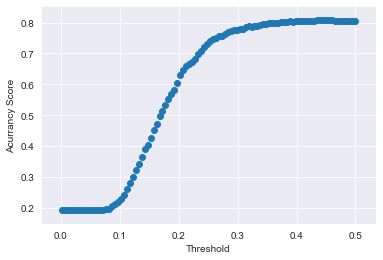

In [42]:
features = ['SPOOL', 'GRAD', 'PTRANSP', 'NEIGHB', 'PSENIORS', 'NCHILD', 'COST']
Anylisis_threshold(X_train, X_test, y_train, y_test, features, detail = False)

Max Acurrancy  0.8063829787234043


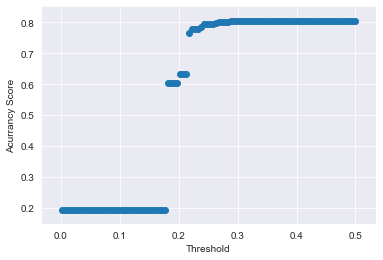

In [43]:
features = ['SPOOL', 'GRAD']
Anylisis_threshold(X_train, X_test, y_train, y_test, features, detail = False)